## 1.4 バンディットアルゴリズムの実装

In [1]:
%load_ext lab_black

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#### スロットマシンの実装

In [3]:
class Bandit:
    def __init__(self, arms=10):
        self.arms = arms
        self.rates = np.random.rand(arms)

    def play(self, arm):
        rate = self.rates[arm]
        reward = rate > np.random.rand()
        return int(reward)

#### エージェントの実装

In [4]:
class Agent:
    def __init__(self, epsilon, action_size=10):
        self.epsilon = epsilon
        self.qs = np.zeros(action_size)
        self.ns = np.zeros(action_size)

    def update(self, action, reward):
        a, r = action, reward
        self.ns[a] += 1
        self.qs[a] += (r - self.qs[a]) / self.ns[a]

    def get_action(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(0, len(self.qs))
        return np.argmax(self.qs)

#### アルゴリズムの平均的な性質

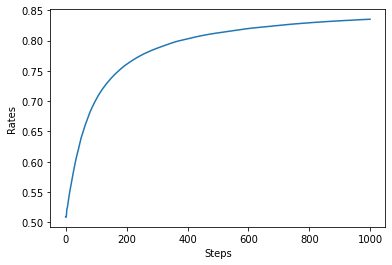

In [5]:
runs = 2000
steps = 1000
epsilon = 0.1
all_rates = np.zeros((runs, steps))  # (2000, 1000)

for run in range(runs):
    bandit = Bandit()
    agent = Agent(epsilon)
    sum_r = 0
    rates = []

    for step in range(steps):
        action = agent.get_action()
        reward = bandit.play(action)
        agent.update(action, reward)
        sum_r += reward
        rates.append(sum_r / (step + 1))

    all_rates[run] = rates

avg_rates = np.average(all_rates, axis=0)

plt.ylabel("Rates")
plt.xlabel("Steps")
plt.plot(avg_rates)
plt.show()